In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Activation, Dropout, Flatten, CuDNNLSTM, Bidirectional, Input, GlobalAveragePooling1D
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, SpatialDropout1D, concatenate, add
from keras.layers import CuDNNGRU, MaxPool1D, AveragePooling1D, AveragePooling2D, MaxPool2D, Concatenate, Average, Maximum
from keras.utils import plot_model
from keras.regularizers import l2
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.engine.topology import Layer, InputSpec
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs

In [2]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [3]:
train_df = train_df.fillna(0)
train_df['target'] = train_df['target'].apply(lambda x: 0 if x <= 0.5 else 1)

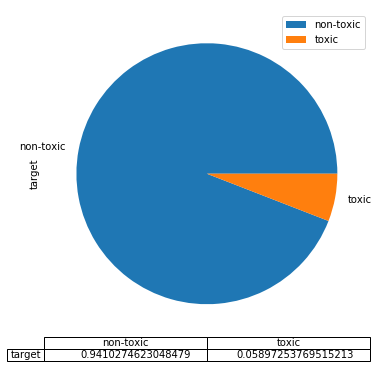

In [4]:
train_df.target.replace({0: 'non-toxic', 1: 'toxic'}).value_counts(normalize=True).plot(kind='pie', 
                                                                            table =True, figsize=(6, 6), legend=True)

In [5]:
symbols_to_isolate = '.,?!-;*"…:—()%#$&_/@＼・ω+=”“[]^–>\\°<~•≠™ˈʊɒ∞§{}·τα❤☺ɡ|¢→̶`❥━┣┫┗Ｏ►★©―ɪ✔®\x96\x92●£♥➤´¹☕≈÷♡◐║▬′ɔː€۩۞†μ✒➥═☆ˌ◄½ʻπδηλσερνʃ✬ＳＵＰＥＲＩＴ☻±♍µº¾✓◾؟．⬅℅»Вав❣⋅¿¬♫ＣＭβ█▓▒░⇒⭐›¡₂₃❧▰▔◞▀▂▃▄▅▆▇↙γ̄″☹➡«φ⅓„✋：¥̲̅́∙‛◇✏▷❓❗¶˚˙）сиʿ✨。ɑ\x80◕！％¯−ﬂﬁ₁²ʌ¼⁴⁄₄⌠♭✘╪▶☭✭♪☔☠♂☃☎✈✌✰❆☙○‣⚓年∎ℒ▪▙☏⅛ｃａｓǀ℮¸ｗ‚∼‖ℳ❄←☼⋆ʒ⊂、⅔¨͡๏⚾⚽Φ×θ￦？（℃⏩☮⚠月✊❌⭕▸■⇌☐☑⚡☄ǫ╭∩╮，例＞ʕɐ̣Δ₀✞┈╱╲▏▕┃╰▊▋╯┳┊≥☒↑☝ɹ✅☛♩☞ＡＪＢ◔◡↓♀⬆̱ℏ\x91⠀ˤ╚↺⇤∏✾◦♬³の｜／∵∴√Ω¤☜▲↳▫‿⬇✧ｏｖｍ－２０８＇‰≤∕ˆ⚜☁'
symbols_to_delete = '\n🍕\r🐵😑\xa0\ue014\t\uf818\uf04a\xad😢🐶️\uf0e0😜😎👊\u200b\u200e😁عدويهصقأناخلىبمغر😍💖💵Е👎😀😂\u202a\u202c🔥😄🏻💥ᴍʏʀᴇɴᴅᴏᴀᴋʜᴜʟᴛᴄᴘʙғᴊᴡɢ😋👏שלוםבי😱‼\x81エンジ故障\u2009🚌ᴵ͞🌟😊😳😧🙀😐😕\u200f👍😮😃😘אעכח💩💯⛽🚄🏼ஜ😖ᴠ🚲‐😟😈💪🙏🎯🌹😇💔😡\x7f👌ἐὶήιὲκἀίῃἴξ🙄Ｈ😠\ufeff\u2028😉😤⛺🙂\u3000تحكسة👮💙فزط😏🍾🎉😞\u2008🏾😅😭👻😥😔😓🏽🎆🍻🍽🎶🌺🤔😪\x08‑🐰🐇🐱🙆😨🙃💕𝘊𝘦𝘳𝘢𝘵𝘰𝘤𝘺𝘴𝘪𝘧𝘮𝘣💗💚地獄谷улкнПоАН🐾🐕😆ה🔗🚽歌舞伎🙈😴🏿🤗🇺🇸мυтѕ⤵🏆🎃😩\u200a🌠🐟💫💰💎эпрд\x95🖐🙅⛲🍰🤐👆🙌\u2002💛🙁👀🙊🙉\u2004ˢᵒʳʸᴼᴷᴺʷᵗʰᵉᵘ\x13🚬🤓\ue602😵άοόςέὸתמדףנרךצט😒͝🆕👅👥👄🔄🔤👉👤👶👲🔛🎓\uf0b7\uf04c\x9f\x10成都😣⏺😌🤑🌏😯ех😲Ἰᾶὁ💞🚓🔔📚🏀👐\u202d💤🍇\ue613小土豆🏡❔⁉\u202f👠》कर्मा🇹🇼🌸蔡英文🌞🎲レクサス😛外国人关系Сб💋💀🎄💜🤢َِьыгя不是\x9c\x9d🗑\u2005💃📣👿༼つ༽😰ḷЗз▱ц￼🤣卖温哥华议会下降你失去所有的钱加拿大坏税骗子🐝ツ🎅\x85🍺آإشء🎵🌎͟ἔ油别克🤡🤥😬🤧й\u2003🚀🤴ʲшчИОРФДЯМюж😝🖑ὐύύ特殊作戦群щ💨圆明园קℐ🏈😺🌍⏏ệ🍔🐮🍁🍆🍑🌮🌯🤦\u200d𝓒𝓲𝓿𝓵안영하세요ЖљКћ🍀😫🤤ῦ我出生在了可以说普通话汉语好极🎼🕺🍸🥂🗽🎇🎊🆘🤠👩🖒🚪天一家⚲\u2006⚭⚆⬭⬯⏖新✀╌🇫🇷🇩🇪🇮🇬🇧😷🇨🇦ХШ🌐\x1f杀鸡给猴看ʁ𝗪𝗵𝗲𝗻𝘆𝗼𝘂𝗿𝗮𝗹𝗶𝘇𝗯𝘁𝗰𝘀𝘅𝗽𝘄𝗱📺ϖ\u2000үսᴦᎥһͺ\u2007հ\u2001ɩｙｅ൦ｌƽｈ𝐓𝐡𝐞𝐫𝐮𝐝𝐚𝐃𝐜𝐩𝐭𝐢𝐨𝐧Ƅᴨןᑯ໐ΤᏧ௦Іᴑ܁𝐬𝐰𝐲𝐛𝐦𝐯𝐑𝐙𝐣𝐇𝐂𝐘𝟎ԜТᗞ౦〔Ꭻ𝐳𝐔𝐱𝟔𝟓𝐅🐋ﬃ💘💓ё𝘥𝘯𝘶💐🌋🌄🌅𝙬𝙖𝙨𝙤𝙣𝙡𝙮𝙘𝙠𝙚𝙙𝙜𝙧𝙥𝙩𝙪𝙗𝙞𝙝𝙛👺🐷ℋ𝐀𝐥𝐪🚶𝙢Ἱ🤘ͦ💸ج패티Ｗ𝙇ᵻ👂👃ɜ🎫\uf0a7БУі🚢🚂ગુજરાતીῆ🏃𝓬𝓻𝓴𝓮𝓽𝓼☘﴾̯﴿₽\ue807𝑻𝒆𝒍𝒕𝒉𝒓𝒖𝒂𝒏𝒅𝒔𝒎𝒗𝒊👽😙\u200cЛ‒🎾👹⎌🏒⛸公寓养宠物吗🏄🐀🚑🤷操美𝒑𝒚𝒐𝑴🤙🐒欢迎来到阿拉斯ספ𝙫🐈𝒌𝙊𝙭𝙆𝙋𝙍𝘼𝙅ﷻ🦄巨收赢得白鬼愤怒要买额ẽ🚗🐳𝟏𝐟𝟖𝟑𝟕𝒄𝟗𝐠𝙄𝙃👇锟斤拷𝗢𝟳𝟱𝟬⦁マルハニチロ株式社⛷한국어ㄸㅓ니͜ʖ𝘿𝙔₵𝒩ℯ𝒾𝓁𝒶𝓉𝓇𝓊𝓃𝓈𝓅ℴ𝒻𝒽𝓀𝓌𝒸𝓎𝙏ζ𝙟𝘃𝗺𝟮𝟭𝟯𝟲👋🦊多伦🐽🎻🎹⛓🏹🍷🦆为和中友谊祝贺与其想象对法如直接问用自己猜本传教士没积唯认识基督徒曾经让相信耶稣复活死怪他但当们聊些政治题时候战胜因圣把全堂结婚孩恐惧且栗谓这样还♾🎸🤕🤒⛑🎁批判检讨🏝🦁🙋😶쥐스탱트뤼도석유가격인상이경제황을렵게만들지않록잘관리해야합다캐나에서대마초와화약금의품런성분갈때는반드시허된사용🔫👁凸ὰ💲🗯𝙈Ἄ𝒇𝒈𝒘𝒃𝑬𝑶𝕾𝖙𝖗𝖆𝖎𝖌𝖍𝖕𝖊𝖔𝖑𝖉𝖓𝖐𝖜𝖞𝖚𝖇𝕿𝖘𝖄𝖛𝖒𝖋𝖂𝕴𝖟𝖈𝕸👑🚿💡知彼百\uf005𝙀𝒛𝑲𝑳𝑾𝒋𝟒😦𝙒𝘾𝘽🏐𝘩𝘨ὼṑ𝑱𝑹𝑫𝑵𝑪🇰🇵👾ᓇᒧᔭᐃᐧᐦᑳᐨᓃᓂᑲᐸᑭᑎᓀᐣ🐄🎈🔨🐎🤞🐸💟🎰🌝🛳点击查版🍭𝑥𝑦𝑧ＮＧ👣\uf020っ🏉ф💭🎥Ξ🐴👨🤳🦍\x0b🍩𝑯𝒒😗𝟐🏂👳🍗🕉🐲چی𝑮𝗕𝗴🍒ꜥⲣⲏ🐑⏰鉄リ事件ї💊「」\uf203\uf09a\uf222\ue608\uf202\uf099\uf469\ue607\uf410\ue600燻製シ虚偽屁理屈Г𝑩𝑰𝒀𝑺🌤𝗳𝗜𝗙𝗦𝗧🍊ὺἈἡχῖΛ⤏🇳𝒙ψՁմեռայինրւդձ冬至ὀ𝒁🔹🤚🍎𝑷🐂💅𝘬𝘱𝘸𝘷𝘐𝘭𝘓𝘖𝘹𝘲𝘫کΒώ💢ΜΟΝΑΕ🇱♲𝝈↴💒⊘Ȼ🚴🖕🖤🥘📍👈➕🚫🎨🌑🐻𝐎𝐍𝐊𝑭🤖🎎😼🕷ｇｒｎｔｉｄｕｆｂｋ𝟰🇴🇭🇻🇲𝗞𝗭𝗘𝗤👼📉🍟🍦🌈🔭《🐊🐍\uf10aლڡ🐦\U0001f92f\U0001f92a🐡💳ἱ🙇𝗸𝗟𝗠𝗷🥜さようなら🔼'

In [6]:
import re
import contractions #pip install contractions
contractions_re = re.compile('(%s)' % '|'.join(contractions.contractions_dict.keys()))
def expand_contractions(s, contractions_dict=contractions.contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

In [7]:
from nltk.tokenize.treebank import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()


isolate_dict = {ord(c):f' {c} ' for c in symbols_to_isolate}
remove_dict = {ord(c):f'' for c in symbols_to_delete}


def handle_punctuation(x):
    x = x.translate(remove_dict)
    x = x.translate(isolate_dict)
    return x

def handle_contractions(x):
    x = expand_contractions(x)
    x = tokenizer.tokenize(x)
    return x

def fix_quote(x):
    x = [x_[1:] if x_.startswith("'") else x_ for x_ in x]
    x = ' '.join(x)
    return x

def preprocess(x):
    x = handle_punctuation(x)
    x = handle_contractions(x)
    x = fix_quote(x)
    return x

In [8]:
x_train = train_df['comment_text'].apply(lambda x:preprocess(x))
y_aux_train = train_df[['target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat']]
x_test = test_df['comment_text'].apply(lambda x:preprocess(x))
y_train = train_df['target'].apply(lambda x: 0 if x <= 0.5 else 1)

In [9]:
print("tokenizing input data...")
tokenizer = Tokenizer(lower=False, char_level=False)
tokenizer.fit_on_texts(x_train.tolist() + x_test.tolist())  #leaky
word_seq_train = tokenizer.texts_to_sequences(x_train)
word_seq_test = tokenizer.texts_to_sequences(x_test)
word_index = tokenizer.word_index
print("dictionary size: ", len(word_index))

tokenizing input data...
dictionary size:  487653


In [10]:
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')

def load_embeddings(path):
    with open(path) as f:
        return dict(get_coefs(*line.strip().split(' ')) for line in tqdm(f))

def build_matrix(word_index, path):
    embedding_index = load_embeddings(path)
    embedding_matrix = np.zeros((len(word_index) + 1, 300))
    unknown_words = []
    
    for word, i in word_index.items():
        try:
            embedding_matrix[i] = embedding_index[word]
        except KeyError:
            unknown_words.append(word)
    return embedding_matrix, unknown_words

In [11]:
FAST_TEXT = './embeddings/crawl-300d-2M.vec'
GLOVE = './embeddings/glove.840B.300d.txt'

In [12]:
ftext_matrix, unknown_words_crawl = build_matrix(tokenizer.word_index, FAST_TEXT)

1999996it [02:08, 15607.91it/s]


In [13]:
glove_matrix, unknown_words_glove = build_matrix(tokenizer.word_index, GLOVE)

2196017it [02:27, 14838.80it/s]


In [14]:
embedding_matrix = np.concatenate([ftext_matrix, glove_matrix], axis=-1)
del ftext_matrix
del glove_matrix
embedding_matrix.shape[0]

487654

In [15]:
seq_lens = list(map(lambda x: len(x), word_seq_train))

In [16]:
MAX_SEQ_LEN = max(seq_lens)
VOCAB_SIZE = embedding_matrix.shape[0]
EMBEDDED_DIMS = 600 

In [17]:
#pad sequences
word_seq_train = sequence.pad_sequences(word_seq_train, maxlen=MAX_SEQ_LEN)
word_seq_test = sequence.pad_sequences(word_seq_test, maxlen=MAX_SEQ_LEN)

In [18]:
from keras import initializers
from keras.models import Model
class AttLayer(Layer):
    def __init__(self, attention_dim):
        self.init = initializers.get('normal')
        self.supports_masking = True
        self.attention_dim = attention_dim
        super(AttLayer, self).__init__()

    def build(self, input_shape):
        assert len(input_shape) == 3
        self.W = K.variable(self.init((input_shape[-1], self.attention_dim)))
        self.b = K.variable(self.init((self.attention_dim, )))
        self.u = K.variable(self.init((self.attention_dim, 1)))
        self.trainable_weights = [self.W, self.b, self.u]
        super(AttLayer, self).build(input_shape)

    def compute_mask(self, inputs, mask=None):
        return mask

    def call(self, x, mask=None):
        # size of x :[batch_size, sel_len, attention_dim]
        # size of u :[batch_size, attention_dim]
        # uit = tanh(xW+b)
        uit = K.tanh(K.bias_add(K.dot(x, self.W), self.b))
        ait = K.dot(uit, self.u)
        ait = K.squeeze(ait, -1)

        ait = K.exp(ait)

        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            ait *= K.cast(mask, K.floatx())
        ait /= K.cast(K.sum(ait, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        ait = K.expand_dims(ait)
        weighted_input = x * ait
        output = K.sum(weighted_input, axis=1)

        return output

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])
    
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

**This model also performed well without the attention layer.**

```python
words = Input(shape=(None,), name='words')
emb = Embedding(VOCAB_SIZE, EMBEDDED_DIMS,
          weights=[embedding_matrix], input_length=MAX_SEQ_LEN, name='embedding')
X = emb(words)
X = SpatialDropout1D(0.2)(X)
X = Bidirectional(CuDNNLSTM(128, return_sequences=True))(X)
X = Bidirectional(CuDNNLSTM(128, return_sequences=True))(X)
hidden = concatenate([ 
    GlobalMaxPooling1D()(X),
    GlobalAveragePooling1D()(X)
    ])
hidden = add([hidden, Dense(512, activation='relu')(hidden)])
hidden = add([hidden, Dense(512, activation='relu')(hidden)])
result = Dense(1, activation='sigmoid')(hidden)

model = Model(inputs =words, outputs =[result])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[auc])
model.summary()
```

In [34]:
words = Input(shape=(None,), name='words')
emb = Embedding(VOCAB_SIZE, EMBEDDED_DIMS,
          weights=[embedding_matrix], input_length=MAX_SEQ_LEN, name='embedding')
X = emb(words)
X = Dropout(0.2)(X)
X = Bidirectional(CuDNNGRU(150, return_sequences=True))(X)
X = Bidirectional(CuDNNGRU(150, return_sequences=True))(X)
A = AttLayer(100)(X)
hidden = Dense(100, activation='relu')(A)
result = Dense(1, activation='sigmoid')(hidden)
model = Model(inputs=words, outputs=result)
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=[auc])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
words (InputLayer)           (None, None)              0         
_________________________________________________________________
embedding (Embedding)        (None, 540, 600)          292592400 
_________________________________________________________________
dropout_10 (Dropout)         (None, 540, 600)          0         
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 540, 300)          676800    
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 540, 300)          406800    
_________________________________________________________________
att_layer_6 (AttLayer)       (None, 300)               30200     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               30100     
__________

In [ ]:
#https://www.kaggle.com/kunwar31/simple-lstm-with-identity-parameters-fastai

In [20]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [35]:
#model training
hist = model.fit(word_seq_train, y_train, batch_size=256, epochs=1, class_weight=class_weights,
                 validation_split=0.125, shuffle=True, verbose=1)

/home/luis.magana/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gradients_impl.py:107: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 292592400 elements. This may consume a large amount of memory.
  num_elements)
/home/luis.magana/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gradients_impl.py:107: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 292592400 elements. This may consume a large amount of memory.
  num_elements)


Train on 1579264 samples, validate on 225610 samples
Epoch 1/1


InternalError: Failed to call ThenRnnForward with model config: [rnn_mode, rnn_input_mode, rnn_direction_mode]: 3, 0, 0 , [num_layers, input_size, num_units, dir_count, seq_length, batch_size]: [1, 300, 150, 1, 540, 256] 
	 [[{{node bidirectional_12/CudnnRNN_1}}]]
	 [[{{node loss_5/mul}}]]

In [22]:
y_test = model.predict(word_seq_test)

In [24]:
#create a submission
submission_df = pd.DataFrame(columns=['id'])
submission_df['id'] = test_df['id'].values 
submission_df['prediction'] = y_test 
submission_df.to_csv("./rnn_submission.csv", index=False)

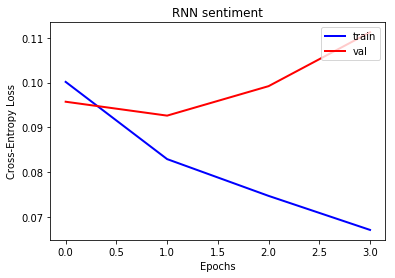

In [60]:
#generate plots
plt.figure()
plt.plot(hist.history['loss'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('RNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

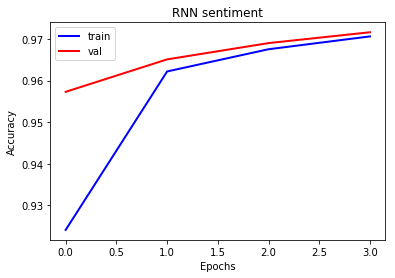

In [61]:
plt.figure()
plt.plot(hist.history['auc'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_auc'], lw=2.0, color='r', label='val')
plt.title('RNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()